In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation,MaxPooling2D
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


In [41]:
# # Zip to .gz Unzip the folder

# import zipfile
# import os

# def extract_zip(file_path, output_dir):
#     # Ensure the output directory exists
#     os.makedirs(output_dir, exist_ok=True)
    
#     with zipfile.ZipFile(file_path, 'r') as zip_ref:
#         zip_ref.extractall(output_dir)

# # Example usage
# file_path = 'D:/Fashion MNIST.zip'  # Replace with your .zip file path
# output_dir = 'D:/'  # Replace with your desired output directory

# extract_zip(file_path, output_dir)



In [42]:
# # to extract .gz to txt for each .gz files

# import gzip
# #
# input_gz_file = 'D:/Fashion MNIST/t10k-images-idx3-ubyte.gz'
# output_file = 'D:/Fashion MNIST/t10k-images-idx3-ubyte.txt'
# with gzip.open(input_gz_file, 'rb') as f_in:
#     with open(output_file, 'wb') as f_out:
#         f_out.write(f_in.read())


# input_gz_file = 'D:/Fashion MNIST/t10k-labels-idx1-ubyte.gz'
# output_file = 'D:/Fashion MNIST/t10k-labels-idx1-ubyte.txt'
# with gzip.open(input_gz_file, 'rb') as f_in:
#     with open(output_file, 'wb') as f_out:
#         f_out.write(f_in.read())


# input_gz_file = 'D:/Fashion MNIST/train-images-idx3-ubyte.gz'
# output_file = 'D:/Fashion MNIST/train-images-idx3-ubyte.txt'
# with gzip.open(input_gz_file, 'rb') as f_in:
#     with open(output_file, 'wb') as f_out:
#         f_out.write(f_in.read())


# input_gz_file = 'D:/Fashion MNIST/train-labels-idx1-ubyte.gz'
# output_file = 'D:/Fashion MNIST/train-labels-idx1-ubyte.txt'
# with gzip.open(input_gz_file, 'rb') as f_in:
#     with open(output_file, 'wb') as f_out:
#         f_out.write(f_in.read())


In [43]:


# X_train = pd.read_csv('D:/Fashion MNIST/train-images-idx3-ubyte.txt', sep=',')
# Y_train = pd.read_csv('D:/Fashion MNIST/train-labels-idx1-ubyte.txt', sep=',')

# X_test = pd.read_csv('D:/Fashion MNIST/t10k-images-idx3-ubyte.txt', sep=',')
# Y_test = pd.read_csv('D:/Fashion MNIST/t10k-labels-idx1-ubyte.txt', sep=',')

In [114]:
def read_image(file):
    with open(file,'rb')as f:
        magic, images,rows,cols = struct.unpack(">IIII",f.read(16))
        img = np.fromfile(f, dtype=np.uint8).reshape(images,rows,cols)
    return img

In [115]:
x_train = read_image("train-images.idx3-ubyte")
x_train.shape

(60000, 28, 28)

In [116]:
def read_label(filename):
    with open(filename,'rb')as f:
        magic,items = struct.unpack(">II",f.read(8))
        labels = np.fromfile(f,dtype=np.uint8)
    return labels

In [117]:
y_train = read_label("train-labels.idx1-ubyte")
y_train.shape

(60000,)

In [118]:
x_test = read_image("t10k-images.idx3-ubyte")
x_test.shape

(10000, 28, 28)

In [119]:
y_test = read_label("t10k-labels.idx1-ubyte")
y_test.shape

(10000,)

In [120]:
x_train[54, 12, 13] 

67

In [121]:
# Values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Hot-One encode
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [122]:
y_train.shape

(60000, 10)

In [133]:
input_layer = Input(shape=(28, 28, 1))


x = Conv2D(filters=28, kernel_size=1, strides=1)(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Second convolutional block
x = Conv2D(filters=28, kernel_size=1, strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# x = Conv2D(filters=56, kernel_size=1, strides=1)(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)


# x = Conv2D(filters=56, kernel_size=1, strides=2)(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)

# Flatten the output
x = Flatten()(x)

# Fully connected layer
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(10)(x)  
output_layer = Activation('softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 28)          │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 28)          │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 28, 28, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 28)          │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 14, 14, 28)          │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 5488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         702,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,486 (2.69 MB)

 Trainable params: 705,118 (2.69 MB)

 Non-trainable params: 368 (1.44 KB)

In [134]:
opt = Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])  

In [135]:
model.fit(x_train,
        y_train,
        batch_size=28,
        epochs=10,
        shuffle=True,
        validation_data = (x_test,y_test))

Epoch 1/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.7684 - loss: 0.6632 - val_accuracy: 0.8303 - val_loss: 0.4607
Epoch 2/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.8314 - loss: 0.4693 - val_accuracy: 0.8383 - val_loss: 0.4513
Epoch 3/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.8364 - loss: 0.4424 - val_accuracy: 0.8396 - val_loss: 0.4443
Epoch 4/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.8475 - loss: 0.4225 - val_accuracy: 0.8496 - val_loss: 0.4172
Epoch 5/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.8469 - loss: 0.4125 - val_accuracy: 0.8535 - val_loss: 0.4030
Epoch 6/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.8552 - loss: 0.3999 - val_accuracy: 0.8538 - val_loss: 0.4013
Epoch 7/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.8581 - loss: 0.3910 - val_accuracy: 0.8483 - val_loss: 0.4253
Epoch 8/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.8586 -

In [136]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8536 - loss: 0.4107


[0.4070148169994354, 0.8532000184059143]

In [137]:
# # Get predicted labels for test images
predicted_labels = model.predict(x_test)
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = np.argmax(y_test, axis=1)

# # Create confusion matrix
# cm = confusion_matrix(true_classes, predicted_classes)

# # Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


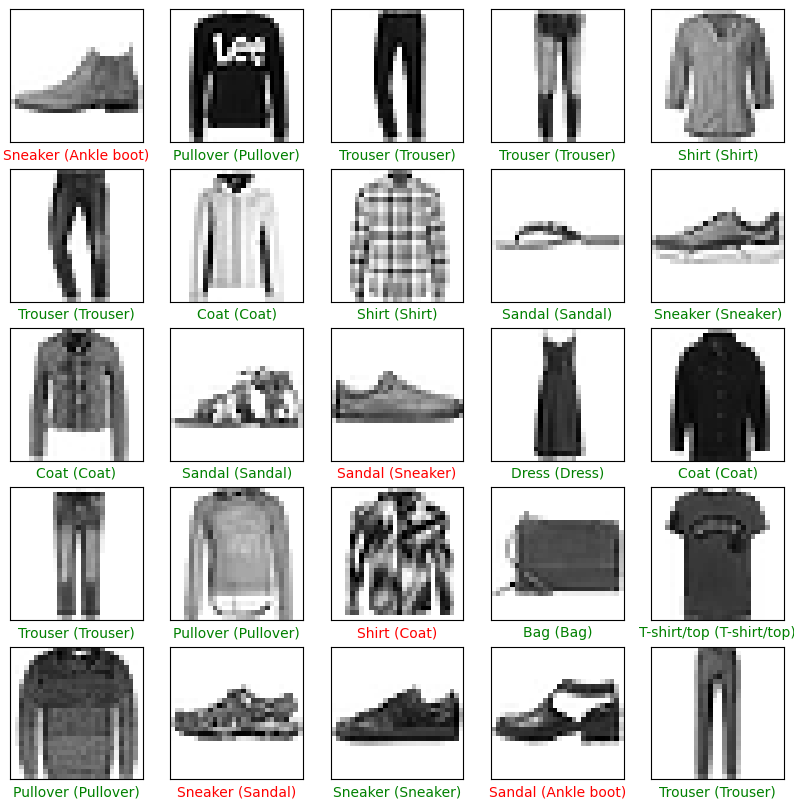

In [138]:
# Define class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some test images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predicted_labels[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()

In [ ]:
# 2Layer

In [127]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
opt = Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])  

In [129]:
model.fit(x_train,
        y_train,
        batch_size=28,
        epochs=10,
        shuffle=True,
        validation_data = (x_test,y_test))

Epoch 1/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.8021 - loss: 0.5707 - val_accuracy: 0.8724 - val_loss: 0.3515
Epoch 2/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.8950 - loss: 0.2918 - val_accuracy: 0.8932 - val_loss: 0.2964
Epoch 3/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9121 - loss: 0.2437 - val_accuracy: 0.9060 - val_loss: 0.2608
Epoch 4/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9251 - loss: 0.2111 - val_accuracy: 0.9113 - val_loss: 0.2495
Epoch 5/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9351 - loss: 0.1808 - val_accuracy: 0.9037 - val_loss: 0.2607
Epoch 6/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9435 - loss: 0.1551 - val_accuracy: 0.9135 - val_loss: 0.2449
Epoch 7/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9501 - loss: 0.1380 - val_accuracy: 0.8994 - val_loss: 0.2863
Epoch 8/10
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9562 -

In [130]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9146 - loss: 0.2841


[0.26492005586624146, 0.9157000184059143]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


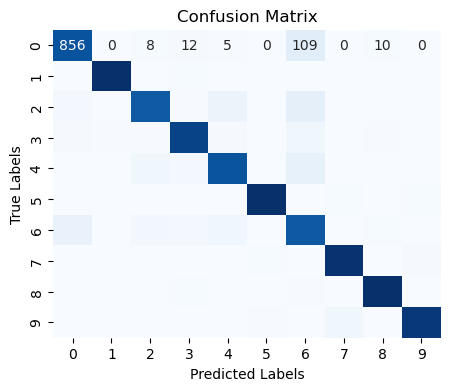

In [131]:
# # Get predicted labels for test images
predicted_labels = model.predict(x_test)
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = np.argmax(y_test, axis=1)

# # Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# # Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

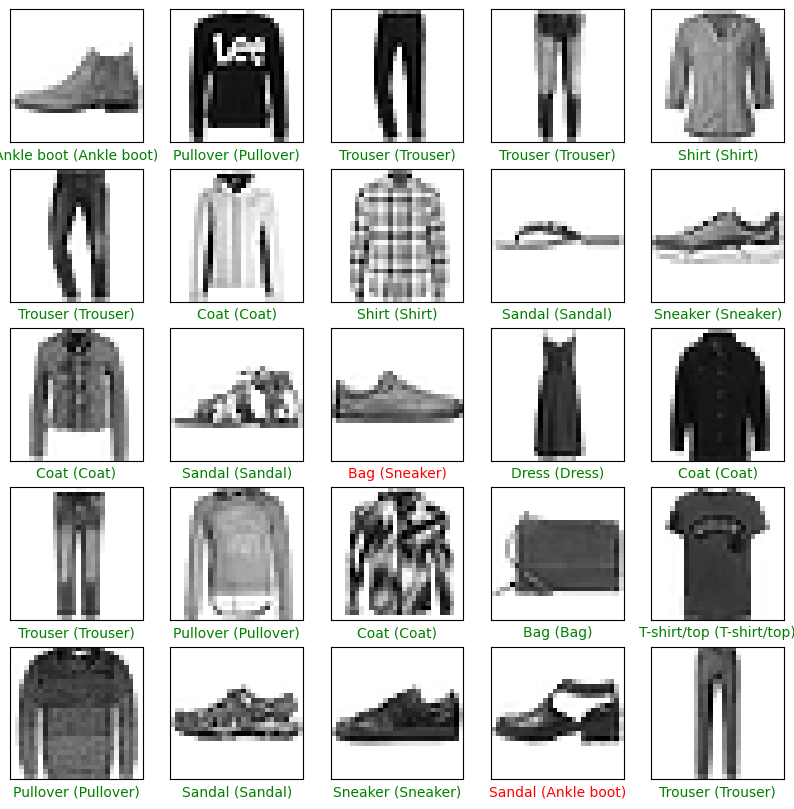

In [132]:
# Define class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some test images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predicted_labels[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()

In [7]:
a = "../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"

In [8]:
a.split('/')[-2:][0]


'test'